In [90]:
# necessary libraries
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

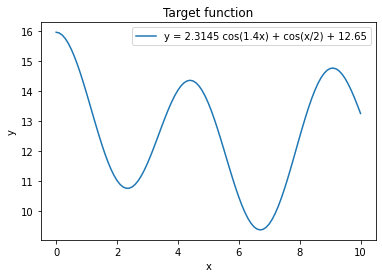

In [106]:
def target_func(x):
    '''Take x and we return an output of the following arbitary formular'''
    return 2.3145*np.cos(1.4*x) + np.cos(x/2) + 12.65

x = np.linspace(0, 10, 101)
y = target_func(x)

plt.plot(x, y, label="y = 2.3145 cos(1.4x) + cos(x/2) + 12.65");
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.title("Target function")
plt.savefig("plots/target_func")

(0.0, 10.0)

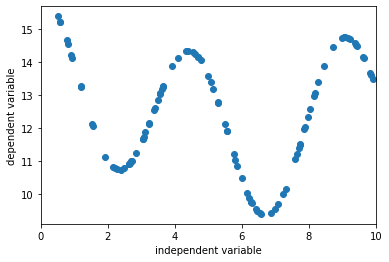

In [92]:
# initalize empty lists
x_coordinates = list()
y_coordinates = list()

# generate random x coordinates for 100 datapoints 
for i in range(100):
    random_x = random.uniform(0, 10)
    x_coordinates.append(random_x)
    
# calculate y coordinates for those x coordinates
for i in x_coordinates:
    corresponding_y = target_func(i)
    y_coordinates.append(corresponding_y)

# convert the list to ndarray to use the property of ndarray
x_coordinates = np.array(x_coordinates)
y_coordinates = np.array(y_coordinates)

# plot resulting data points (not noisy so far)
plt.scatter(x_coordinates, y_coordinates)

plt.ylabel('dependent variable')
plt.xlabel('independent variable')
plt.xlim((0, 10))

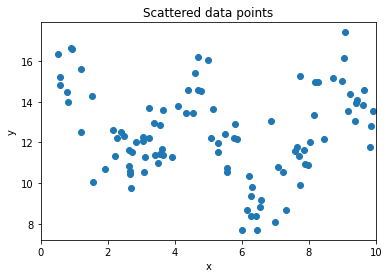

In [93]:
# add gaussian distributed noise to the y coordinates
for corresponding_y in range(len(y_coordinates)):
    y_coordinates[corresponding_y] += np.random.normal(0, 1.3)

# plot resulting noisy data points
plt.scatter(x_coordinates, y_coordinates)

# setting and labeling your axis
plt.ylabel('y')
plt.xlabel('x')
plt.xlim((0, 10))
plt.title("Scattered data points")
plt.savefig("plots/datapoints")

In [94]:
# all the functions necessary for polynomial regression
def poly_dm(x,m):
    ϕ = np.ones((len(x), m+1))
    for i in range(1, m+1):
        ϕ[:, i] = x**i
    return ϕ

def pseudoinverse(A):
    return np.dot(np.linalg.inv( np.dot(A.T, A)), A.T)

def poly_regress(x, y, deg):
    ϕ = poly_dm(x, deg)
    pseudo = pseudoinverse(ϕ)
    return np.dot(pseudo,y)

def polynom(x, w):
    y = 0
    for i in range(len(w)):
        y += w[i]*(x**i)        
    return y

# the target function
def target_func(x):
    return 1.5*np.sin(x) - np.cos(x/2) + 0.5

# error function - root mean squared error
def rmse(y, yhat):
    rmse = np.sqrt(np.sum((y - yhat)**2)/len(y))
    return rmse

In [95]:
def plot_fit(mlist=list):
    '''Plot of how well polynomials of a degree m (in mlist) fits the noisy data (x_coordinates, y_coordinates)

    Parameters
    ----------
    mlist: 1d list
           list of numbers which indicate the degree of polynomials used for the polynomial regression
    '''

    plt.figure(figsize=(10, 8))
    plt.scatter(x_coordinates, y_coordinates, label='data samples')
    plt.plot(x, y, label='target function',lw=4)
    
    wlist = list()
    ylist = list()

    for i in range(len(mlist)):
        new_w = poly_regress(x_coordinates, y_coordinates, mlist[i])
        wlist.append(new_w)

        newY = polynom(x, wlist[i])
        ylist.append(newY)

        plt.plot(x, ylist[i], label="degree: {}".format(mlist[i]))
        plt.legend();
    
    plt.title("Models with degree of {}".format(mlist))
    plt.savefig("plots/Fitting_w_degree_{}".format(mlist))
    plt.show()

In [96]:
def plot_error(train_x, train_y, test_x, test_y, mlist=list):
    '''Plot how well a polynomial regression with degree m approximates our target function by calculating RMSE

    Parameters
    ----------
    train_x, train_y, test_x, test_y: ndarrays of train, test datasets
    mlist: 1d list
           list of numbers which indicate the degree of polynomials used for the polynomial regression
    '''

    # The error array, different name
    error_sub = list()

    # The error array
    error = list()

    # for each m
    for m in mlist:

        # train polynomial model
        w = poly_regress(train_x, train_y, m) # update weights

        # evaluate polynomial at inputs x (with the weight w from dataset (X,Y)) and store result in y_hat
        y_hat = polynom(test_x, w)

        # calculate RMSE between y and y_hat and store it in error
        error.append(rmse(test_y, y_hat))

    # plot the result
    plt.xlabel("degree of the polynomial")
    plt.ylabel("error")
    plt.plot(mlist, error, marker=".", color = "red")
    plt.title("Error of models with degree of {}".format(mlist))
    plt.savefig("plots/Error_w_degree_of_{}".format(mlist))
    plt.show()


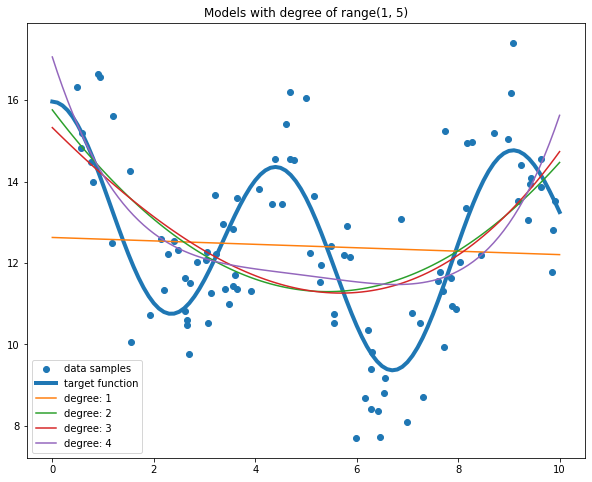

In [97]:
plot_fit(range(1,5))

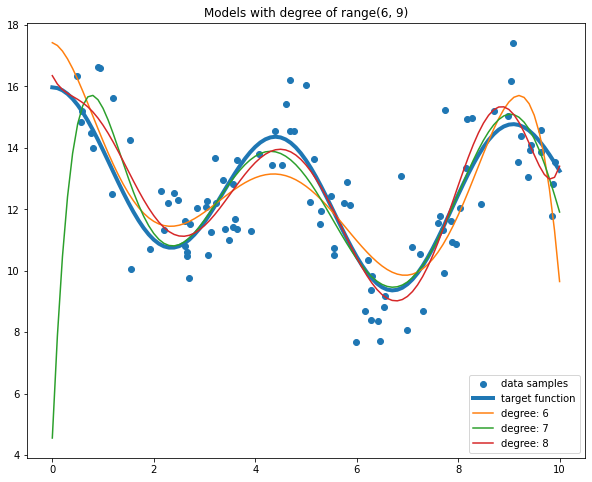

In [98]:
plot_fit(range(6,9))

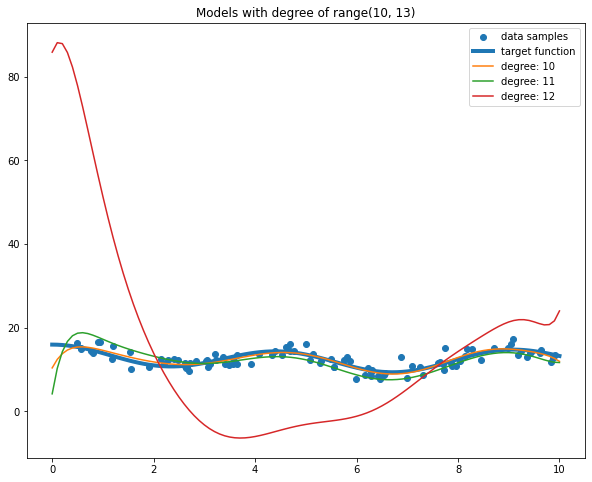

In [99]:
plot_fit(range(10,13))

### Split the dataset in two! 
### We train with the train dataset and test whether the trained model works properly with the test dataset

In [100]:
# first 50 for training, last 50 for testing
X_train = x_coordinates[:50]
X_test = x_coordinates[50:]

# the same for the depenent variable
Y_train = y_coordinates[:50]
Y_test = y_coordinates[50:]

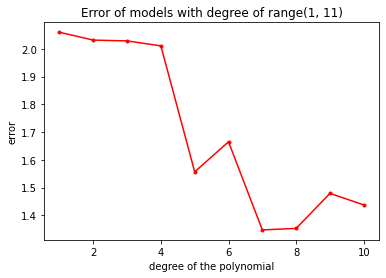

In [101]:
plot_error(X_train, Y_train, X_test, Y_test, range(1,11))

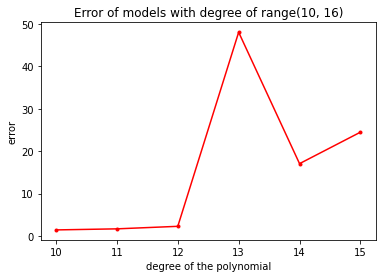

In [102]:
plot_error(X_train, Y_train, X_test, Y_test, range(10,16))

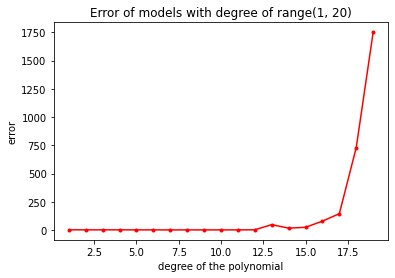

In [107]:
plot_error(X_train, Y_train, X_test, Y_test, range(1,20))

# 